In [1]:
%matplotlib inline

In [107]:
#import cv2
from scipy.misc import imread
import matplotlib.pyplot as plt
from pathlib import Path
import xml.etree.ElementTree as ET
import re
import numpy as np
from skimage.feature import hog
from skimage.color import rgb2gray
from skimage.io import imsave
import random
import pandas as pd
from sklearn.feature_extraction.image import extract_patches_2d


In [116]:
imgs = []
#positive_hogs = []
fnames = []
labels = []

for p in Path('cropped').iterdir():
    img = imread(str(p))
    imgs.append(img)
    fnames.append(str(p))
    labels.append(1)
    
for p in Path('negative_samples').iterdir():
    img = imread(str(p))
    imgs.append(img)
    fnames.append(str(p))
    labels.append(0)

In [117]:
df = pd.DataFrame({'fname': fnames, 'label': labels})

df

,fname,label
0,cropped\0_samples_Anthopleuramariscali_MEX20@_...,1
1,cropped\0_samples_Anthopleuramariscali_MEX20@_...,1
2,cropped\0_samples_Anthopleuramariscali_MEX20@_...,1
3,cropped\0_samples_Anthopleuramariscali_MEX20@_...,1
4,cropped\0_samples_Anthopleuramariscali_MEX20@_...,1
5,cropped\0_samples_Anthopleuramariscali_MEX20@_...,1
6,cropped\0_samples_Anthopleuramariscali_MEX20@_...,1
7,cropped\0_samples_AnthopleuraMEX1@_filament_im...,1
8,cropped\0_samples_AnthopleuraMEX1@_filament_im...,1
9,cropped\0_samples_AnthopleuraMEX1@_filament_im...,1


In [118]:
hogs = []
for i in imgs:
    gray = resize(rgb2gray(i), (100,100))
    h = hog(gray, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1))
    #print(h.shape)
    hogs.append(h)
    

c:\Users\Jeremy\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\Users\Jeremy\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [135]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

mod = AdaBoostClassifier(RandomForestClassifier(), 5)
#mod = RandomForestClassifier()
mod.fit(np.array(hogs), df['label'].values.reshape((-1,1)))

(mod.predict(np.array(hogs)) == df['label'].values).mean()

c:\Users\Jeremy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

In [16]:
df['label'].values.reshape((-1,1))

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [22]:
np.array(hogs).shape

(372,)

In [23]:
len(hogs)

372

In [27]:
hog(gray, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), feature_vector=False)

c:\Users\Jeremy\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


array([[[[[ 0.1068028 ,  0.13798603,  0.17304562,  0.16148488,  0.06631301,
            0.12712463,  0.07735238,  0.14766678]]],


        [[[ 0.10189813,  0.10339557,  0.11729512,  0.12048547,  0.19119933,
            0.12330396,  0.10777679,  0.13229509]]],


        [[[ 0.12567286,  0.1718131 ,  0.12881863,  0.13036983,  0.1239032 ,
            0.10922711,  0.08430938,  0.12359112]]],


        [[[ 0.13119794,  0.15085625,  0.18353028,  0.11646428,  0.10852821,
            0.10191782,  0.09152642,  0.11362019]]],


        [[[ 0.10604467,  0.125542  ,  0.16317184,  0.10686634,  0.10494117,
            0.12869094,  0.11687582,  0.14537566]]],


        [[[ 0.12043528,  0.11135182,  0.09871457,  0.15596768,  0.12209527,
            0.16041574,  0.13883667,  0.08985257]]],


        [[[ 0.08617561,  0.10278833,  0.11176612,  0.14027363,  0.15760024,
            0.12796852,  0.16838557,  0.10290262]]],


        [[[ 0.12918291,  0.13033583,  0.13612188,  0.12854315,  0.12552884,
       

In [26]:
h

array([ 0.1068028 ,  0.13798603,  0.17304562,  0.16148488,  0.06631301,
        0.12712463,  0.07735238,  0.14766678,  0.10189813,  0.10339557,
        0.11729512,  0.12048547,  0.19119933,  0.12330396,  0.10777679,
        0.13229509,  0.12567286,  0.1718131 ,  0.12881863,  0.13036983,
        0.1239032 ,  0.10922711,  0.08430938,  0.12359112,  0.13119794,
        0.15085625,  0.18353028,  0.11646428,  0.10852821,  0.10191782,
        0.09152642,  0.11362019,  0.10604467,  0.125542  ,  0.16317184,
        0.10686634,  0.10494117,  0.12869094,  0.11687582,  0.14537566,
        0.12043528,  0.11135182,  0.09871457,  0.15596768,  0.12209527,
        0.16041574,  0.13883667,  0.08985257,  0.08617561,  0.10278833,
        0.11176612,  0.14027363,  0.15760024,  0.12796852,  0.16838557,
        0.10290262,  0.12918291,  0.13033583,  0.13612188,  0.12854315,
        0.12552884,  0.14246632,  0.11745908,  0.08816603,  0.15645863,
        0.08383318,  0.11940514,  0.13852572,  0.14694707,  0.13

c:\Users\Jeremy\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


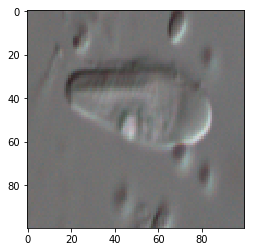

In [31]:
from skimage.transform import resize

plt.imshow(resize(imgs[2], (100,100)))

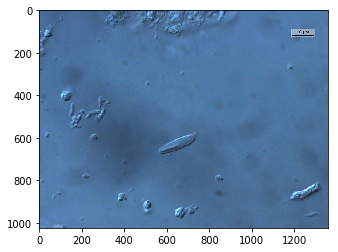

In [36]:
test_img = imread('samples\\Anthopleura_MEX13@\\image0010.tif')

plt.imshow(test_img)

In [64]:
from sklearn.feature_extraction.image import extract_patches_2d

test_hogs = []
patches = extract_patches_2d(rgb2gray(test_img), (100,100), 100)
for patch in patches:
    #plt.imshow(patch); plt.show()
    test_hogs.append(hog(patch, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1)))
    
mod.predict(test_hogs)

c:\Users\Jeremy\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [65]:
np.where(mod.predict(test_hogs))

(array([18], dtype=int64),)

18


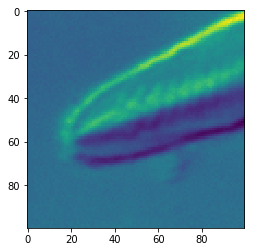

In [66]:
for i in np.where(mod.predict(test_hogs))[0]:
    print(i)
    plt.imshow(patches[i]); plt.show()

In [50]:
extract_patches_2d(rgb2gray(test_img), (100,100), 100).reshape((-1, 100**2)).shape

(100, 10000)

In [51]:
mod.predict(extract_patches_2d(rgb2gray(test_img), (100,100), 100).reshape((-1, 100**2)))

ValueError: Number of features of the model must match the input. Model n_features is 288 and input n_features is 10000 

In [74]:
from skimage.util import view_as_windows
view_as_windows(rgb2gray(test_img), (100,100), 100).shape

(10, 13, 100, 100)

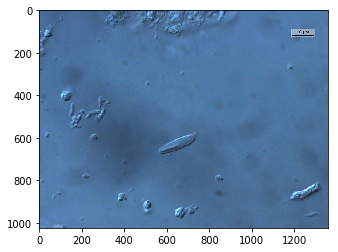

In [91]:
plt.imshow(test_img)

c:\Users\Jeremy\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


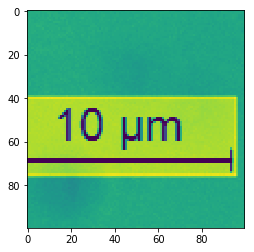

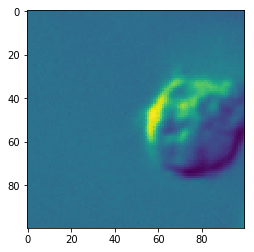

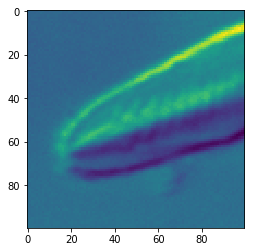

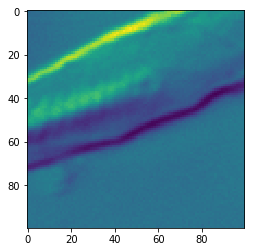

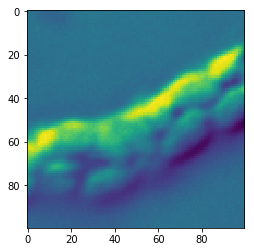

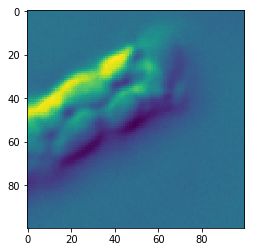

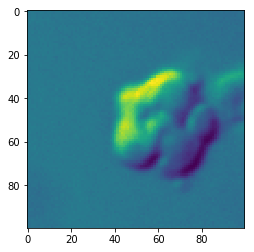

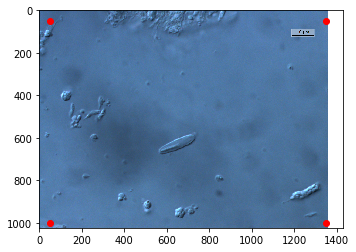

In [120]:
test_img = imread('samples\\Anthopleura_MEX13@\\image0010.tif')

x_coords = []
y_coords = []

windows = view_as_windows(rgb2gray(test_img), (100,100), 50)
for y in range(0, windows.shape[0]):
    for x in range(0, windows.shape[1]):
        h = hog(windows[y][x], orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1))
        if mod.predict([h])[0]:
            plt.imshow(windows[y][x]); plt.show()
            x_coords.append(x*50)
            x_coords.append(x*50+100)
            y_coords.append(y*50)
            y_coords.append(y*50+100)
            
plt.imshow(test_img)
xs = np.array(x_coords).min(), np.array(x_coords).max()
ys = np.array(y_coords).min(), np.array(y_coords).max()
plt.scatter([xs[0], xs[0], xs[1], xs[1]], [ys[0], ys[1], ys[0], ys[1]], c='red')

c:\Users\Jeremy\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\Users\Jeremy\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


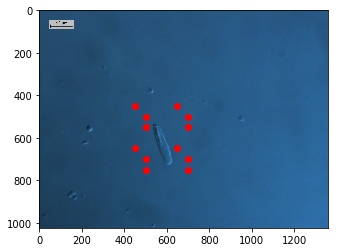

In [136]:
test_img = imread('samples\\Anthopleura_MEX13@\\image0019.tif')

x_coords = []
y_coords = []

plt.imshow(test_img)

windows = view_as_windows(rgb2gray(test_img), (200,200), 50)
for y in range(0, windows.shape[0]):
    for x in range(0, windows.shape[1]):
        h = hog(resize(windows[y][x], (100,100)), orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1))
        if mod.predict([h])[0]:
            #plt.imshow(windows[y][x]); plt.show()
            x_coords.append(x*50)
            x_coords.append(x*50+200)
            y_coords.append(y*50)
            y_coords.append(y*50+200)
            
            plt.scatter([x*50, x*50, x*50+200, x*50+200], [y*50, y*50+200, y*50, y*50+200], c='red')
            
#plt.imshow(test_img)
xs = np.array(x_coords).min(), np.array(x_coords).max()
ys = np.array(y_coords).min(), np.array(y_coords).max()
#plt.scatter([xs[0], xs[0], xs[1], xs[1]], [ys[0], ys[1], ys[0], ys[1]], c='red')

c:\Users\Jeremy\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\Users\Jeremy\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


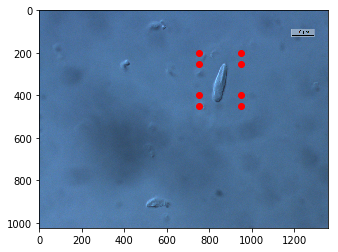

In [137]:
test_img = imread('samples\\Anthopleura_MEX13@\\image0013.tif')

x_coords = []
y_coords = []

plt.imshow(test_img)

windows = view_as_windows(rgb2gray(test_img), (200,200), 50)
for y in range(0, windows.shape[0]):
    for x in range(0, windows.shape[1]):
        h = hog(resize(windows[y][x], (100,100)), orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1))
        if mod.predict([h])[0]:
            #plt.imshow(windows[y][x]); plt.show()
            x_coords.append(x*50)
            x_coords.append(x*50+200)
            y_coords.append(y*50)
            y_coords.append(y*50+200)
            
            plt.scatter([x*50, x*50, x*50+200, x*50+200], [y*50, y*50+200, y*50, y*50+200], c='red')
            
#plt.imshow(test_img)
xs = np.array(x_coords).min(), np.array(x_coords).max()
ys = np.array(y_coords).min(), np.array(y_coords).max()
#plt.scatter([xs[0], xs[0], xs[1], xs[1]], [ys[0], ys[1], ys[0], ys[1]], c='red')

c:\Users\Jeremy\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


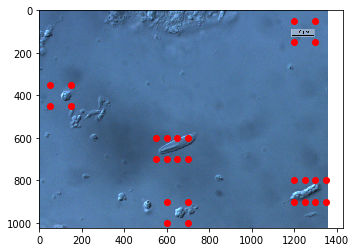

In [123]:
test_img = imread('samples\\Anthopleura_MEX13@\\image0010.tif')

x_coords = []
y_coords = []

plt.imshow(test_img)

windows = view_as_windows(rgb2gray(test_img), (200,200), 50)
for y in range(0, windows.shape[0]):
    for x in range(0, windows.shape[1]):
        h = hog(windows[y][x], orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1))
        if mod.predict([h])[0]:
            #plt.imshow(windows[y][x]); plt.show()
            x_coords.append(x*50)
            x_coords.append(x*50+100)
            y_coords.append(y*50)
            y_coords.append(y*50+100)
            
            plt.scatter([x*50, x*50, x*50+100, x*50+100], [y*50, y*50+100, y*50, y*50+100], c='red')
            
#plt.imshow(test_img)
xs = np.array(x_coords).min(), np.array(x_coords).max()
ys = np.array(y_coords).min(), np.array(y_coords).max()
#plt.scatter([xs[0], xs[0], xs[1], xs[1]], [ys[0], ys[1], ys[0], ys[1]], c='red')

c:\Users\Jeremy\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


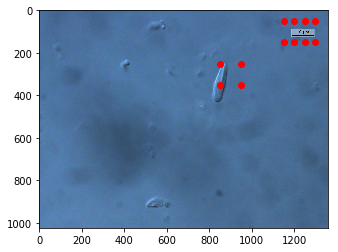

In [124]:
test_img = imread('samples\\Anthopleura_MEX13@\\image0013.tif')

x_coords = []
y_coords = []

plt.imshow(test_img)

windows = view_as_windows(rgb2gray(test_img), (100,100), 50)
for y in range(0, windows.shape[0]):
    for x in range(0, windows.shape[1]):
        h = hog(windows[y][x], orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1))
        if mod.predict([h])[0]:
            #plt.imshow(windows[y][x]); plt.show()
            x_coords.append(x*50)
            x_coords.append(x*50+100)
            y_coords.append(y*50)
            y_coords.append(y*50+100)
            
            plt.scatter([x*50, x*50, x*50+100, x*50+100], [y*50, y*50+100, y*50, y*50+100], c='red')
            
#plt.imshow(test_img)
xs = np.array(x_coords).min(), np.array(x_coords).max()
ys = np.array(y_coords).min(), np.array(y_coords).max()
#plt.scatter([xs[0], xs[0], xs[1], xs[1]], [ys[0], ys[1], ys[0], ys[1]], c='red')

c:\Users\Jeremy\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\Users\Jeremy\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


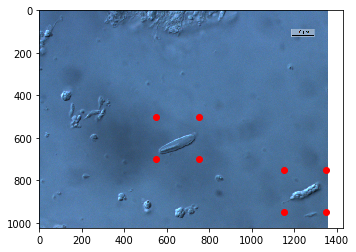

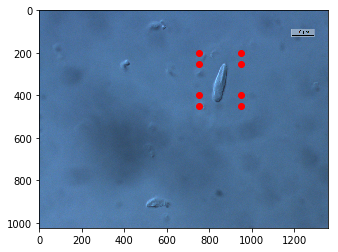

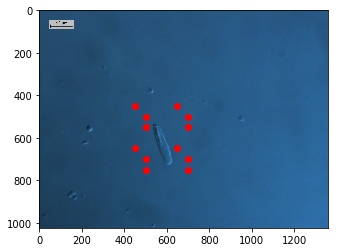

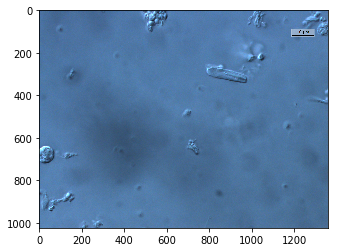

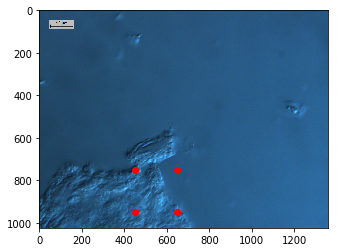

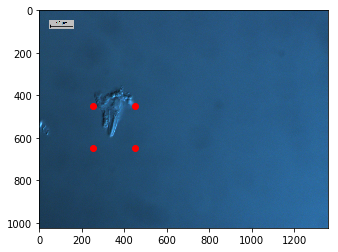

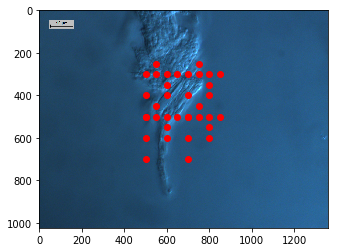

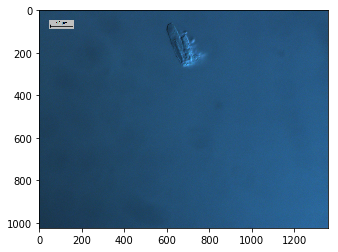

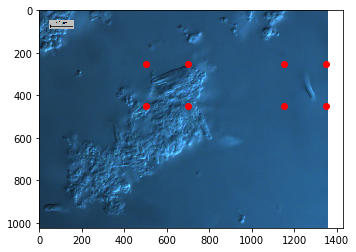

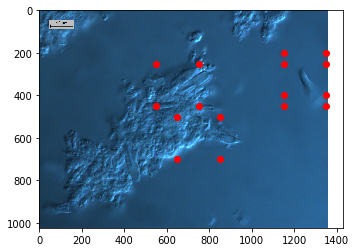

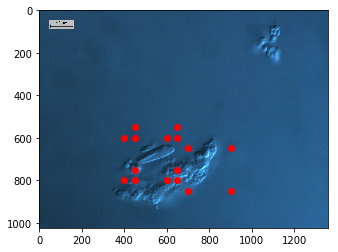

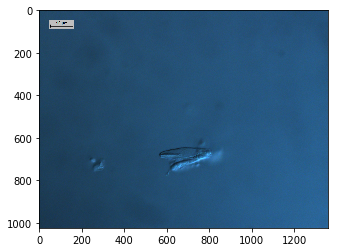

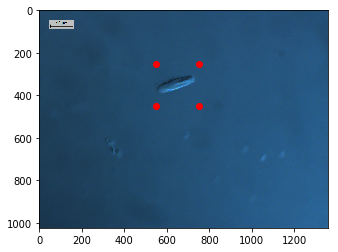

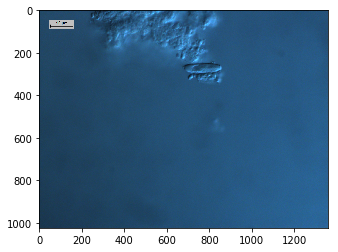

In [139]:
for p in Path('samples').glob('Anthopleura_MEX13@/*.tif'):
    test_img = imread(str(p))

    x_coords = []
    y_coords = []

    plt.imshow(test_img)

    windows = view_as_windows(rgb2gray(test_img), (200,200), 50)
    for y in range(0, windows.shape[0]):
        for x in range(0, windows.shape[1]):
            h = hog(resize(windows[y][x], (100,100)), orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1))
            if mod.predict([h])[0]:
                #plt.imshow(windows[y][x]); plt.show()
                x_coords.append(x*50)
                x_coords.append(x*50+200)
                y_coords.append(y*50)
                y_coords.append(y*50+200)

                plt.scatter([x*50, x*50, x*50+200, x*50+200], [y*50, y*50+200, y*50, y*50+200], c='red')

    #plt.imshow(test_img)
    #xs = np.array(x_coords).min(), np.array(x_coords).max()
    #ys = np.array(y_coords).min(), np.array(y_coords).max()
    #plt.scatter([xs[0], xs[0], xs[1], xs[1]], [ys[0], ys[1], ys[0], ys[1]], c='red')
    plt.show()